In [ ]:
#Loading and transforming images

#LR, adding conv layers, data augmentation -- hyperparameters tuning!!
# Data Augmentation to sove the overfitting issue, using a large dataset,,, minor alterations to our existing dataset should help! seperate distinct images!!

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms, datasets
from torch import nn
import torch.nn.functional as F

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

In [ ]:
transform_train = transforms.Compose([transforms.Resize((32,32)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(10),
                                transforms.RandomAffine(0,shear=10, scale = ((0.8,1.2))),
                                transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

transform = transforms.Compose([transforms.Resize((32,32)),
                                transforms.ToTensor(),
                                transforms.Norma lize((0.5,0.5,0.5), (0.5,0.5,0.5))])

training_dataset = datasets.CIFAR10(root ='./data',train = True, download= True, transform = transform_train )
validation_dataset = datasets.CIFAR10(root ='./data',train = False, download= True, transform = transform )

training_loader = torch.utils.data.DataLoader(dataset=training_dataset,batch_size=100,shuffle= True)
val_loader = torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=100,shuffle= False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
"""for inputs,labels in training_loader:
    print (inputs.shape)
    inputs = inputs.view(inputs.shape[0],-1)
    print (inputs)
    print (inputs.shape)
    break 
    """

'for inputs,labels in training_loader:\n    print (inputs.shape)\n    inputs = inputs.view(inputs.shape[0],-1)\n    print (inputs)\n    print (inputs.shape)\n    break \n    '

In [ ]:
def image_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1,2,0)  # channels height width to height width channel 
  image = image*np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

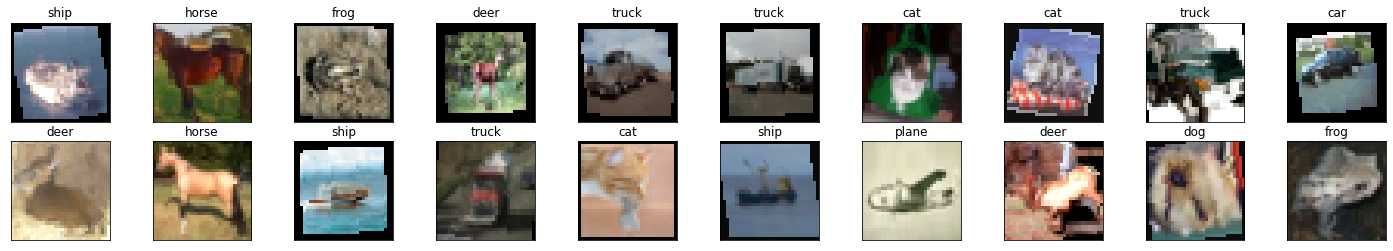

In [ ]:
dataiter = iter(training_loader)
images,labels = dataiter.next()
fig = plt.figure(figsize =(25,4))

for index in np.arange(20):
  ax = fig.add_subplot(2,10,index+1,xticks=[],yticks=[])
  plt.imshow(image_convert(images[index]))
  ax.set_title (classes[labels[index].item()])


In [ ]:
class LeNet(nn.Module):
  def __init__(self,):
    super().__init__()
    self.conv1=nn.Conv2d(3,16,3,1, padding = 1) 
    self.conv2=nn.Conv2d(16,32,3,1,padding = 1 )
    self.conv3=nn.Conv2d(32,64,3,1,padding = 1 )  
    self.fc1= nn.Linear(4*4*64,500)
    self.dropout1 = nn.Dropout(0.5)
    self.fc2= nn.Linear(500,10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x,2,2)
    x = x.view(-1,4*4*64)
    x = F.relu(self.fc1(x))
    x = self.dropout1(x)
    x = self.fc2(x)
  
    return x



In [ ]:
model = LeNet().to(device)
model

LeNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_his = []
val_running_correct_his = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss= 0.0
  val_correct = 0.0

  for inputs,labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)

    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _,preds= torch.max(outputs,1)
    running_corrects+=torch.sum(preds == labels.data)


    running_loss+=loss.item()
  
  else:
    with torch.no_grad():
      for val_inputs,val_labels in val_loader:
        
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)

        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs,val_labels)

        _,val_preds= torch.max(val_outputs,1)
        val_correct+=torch.sum(val_preds == val_labels.data)
        val_running_loss+=val_loss.item()

    epoch_loss= running_loss/len(training_loader)
    epoch_accuracy= running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_accuracy)

    val_epoch_loss= val_running_loss/len(val_loader)
    val_epoch_accuracy= val_correct.float()/len(val_loader) 
    val_running_loss_his.append(val_epoch_loss)
    val_running_correct_his.append(val_epoch_accuracy)

    print ('epoch:', (e+1))

    print ("Training loss: {:.4f}, acc {:.4f}".format(epoch_loss,epoch_accuracy.item()))
    print ("Validation loss: {:.4f}, acc {:.4f}".format(val_epoch_loss,val_epoch_accuracy.item()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch: 1
Training loss: 1.6949, acc 37.7640
Validation loss: 1.4310, acc 48.1000
epoch: 2
Training loss: 1.3909, acc 49.6400
Validation loss: 1.2453, acc 54.7400
epoch: 3
Training loss: 1.2652, acc 54.7320
Validation loss: 1.1408, acc 59.4000
epoch: 4
Training loss: 1.1767, acc 58.2880
Validation loss: 1.0529, acc 62.5500
epoch: 5
Training loss: 1.1050, acc 60.7080
Validation loss: 0.9962, acc 64.5400
epoch: 6
Training loss: 1.0613, acc 62.2640
Validation loss: 0.9735, acc 65.3800
epoch: 7
Training loss: 1.0212, acc 64.1040
Validation loss: 0.9356, acc 66.8900
epoch: 8
Training loss: 0.9838, acc 65.5120
Validation loss: 0.9721, acc 65.6600
epoch: 9
Training loss: 0.9539, acc 66.4360
Validation loss: 0.8605, acc 70.3400
epoch: 10
Training loss: 0.9295, acc 67.3560
Validation loss: 0.8764, acc 69.3900
epoch: 11
Training loss: 0.9070, acc 68.2540
Validation loss: 0.8334, acc 70.9000
epoch: 12
Training loss: 0.8918, acc 68.9360
Validation loss: 0.8117, acc 71.5500
epoch: 13
Training loss: 

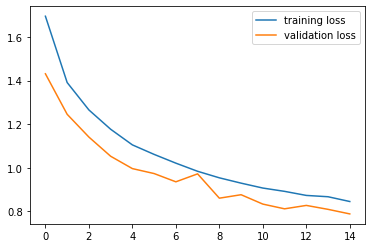

In [ ]:
# labeprint (running_loss_history)
plt.plot(running_loss_history,label='training loss')
plt.plot(val_running_loss_his,label='validation loss')
plt.legend()

In [ ]:
running_corrects_history

[tensor(37.7640, device='cuda:0'),
 tensor(49.6400, device='cuda:0'),
 tensor(54.7320, device='cuda:0'),
 tensor(58.2880, device='cuda:0'),
 tensor(60.7080, device='cuda:0'),
 tensor(62.2640, device='cuda:0'),
 tensor(64.1040, device='cuda:0'),
 tensor(65.5120, device='cuda:0'),
 tensor(66.4360, device='cuda:0'),
 tensor(67.3560, device='cuda:0'),
 tensor(68.2540, device='cuda:0'),
 tensor(68.9360, device='cuda:0'),
 tensor(69.6320, device='cuda:0'),
 tensor(69.6440, device='cuda:0'),
 tensor(70.3480, device='cuda:0')]

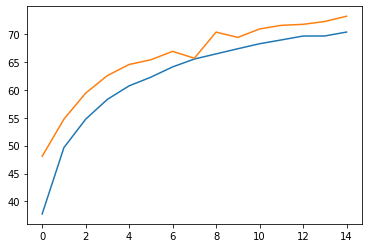

In [ ]:
plt.plot(running_corrects_history,label='training_Accuracy')
plt.plot(val_running_correct_his,label ="Validation Accuracy")

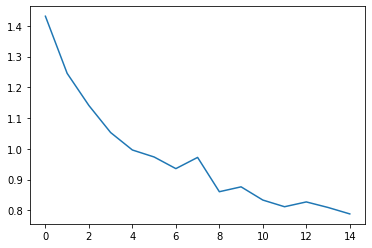

In [ ]:
plt.plot(val_running_loss_his,label='training_Accuracy')

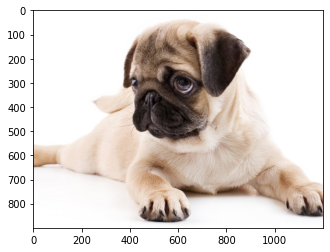

In [ ]:
import requests
from PIL import Image
url = 'https://i.guim.co.uk/img/media/fe1e34da640c5c56ed16f76ce6f994fa9343d09d/0_174_3408_2046/master/3408.jpg?width=1200&height=900&quality=85&auto=format&fit=crop&s=0d3f33fb6aa6e0154b7713a00454c83d'
response = requests.get(url,stream=True)
img = Image.open(response.raw)
plt.imshow(img)

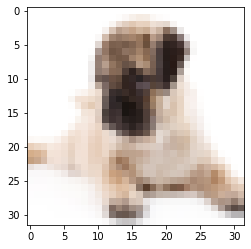

In [ ]:
img = transform(img)
plt.imshow(image_convert(img))

In [ ]:
img = img.to(device).unsqueeze(0).unsqueeze(0)
img = img[0]
outputs = model(img)
_,pred= torch.max(outputs,1)

print (classes[pred.item()])

dog


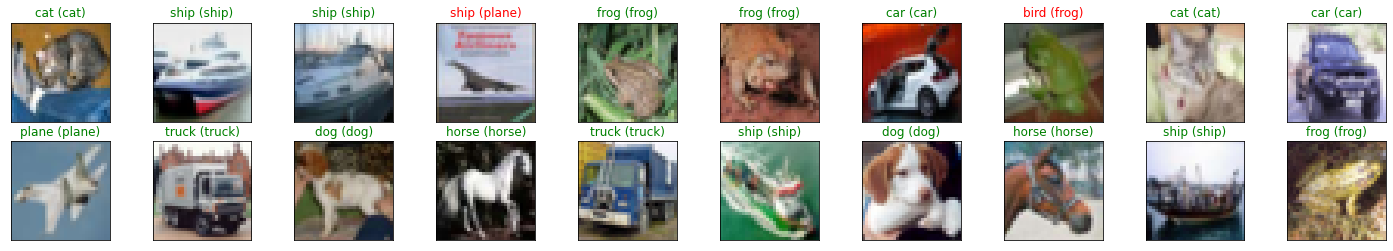

In [ ]:
dataiter = iter(val_loader)
images, label = dataiter.next()
images = images.to(device)
label = label.to(device)
output = model(images)
_,preds= torch.max(output,1)

fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])
  plt.imshow(image_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[label[idx].item()])),color=("green" if preds[idx]==label[idx] else "red"))